# Tarea 8.1

¿Entrenar con más características y con base a las probabilidades, y dado un input  definir a qué clase pertenece: `'versicolor'`, `'virginica'` ?

Por ejemplo, dado X = [4.9, 5.0, 1.8, 0.3] asociados a todas las características, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virgínica?




In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

In [3]:
iris = datasets.load_iris()

X = iris['data']
Y = iris['target']

names_features = iris['feature_names']
names_target = iris['target_names']

df = pd.DataFrame(X, columns=names_features)

# Nombramos las características con la convención PascalCase
#
columns_name = ["".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name = [col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols
# Añadimos la característica objetivo
df['Target'] = Y
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
""" 1. Creamos una muestra de entrenamiento y prueba """

# índices para los datos
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# La estratificación se realiza en función de las etiquetas de la variable_objetivo
#
for train_index, test_index in split.split(df, df['Target']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

# Datos de entrenamiento y prubea
df_train = strat_train_set
df_test = strat_test_set

In [5]:
""" 2. Realizamos la regresión logística para determinar la probabilidad para la clase Setosa """

clases = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

def class_predict(classes, num_class, X):
  #
  X_train = df_train.iloc[:,0:4].values   # Tomamos todas las características
  y_train = (df_train['Target'] == num_class).astype(float)

  X_test = df_test.iloc[:,0:4].values
  y_test = (df_test['Target'] == num_class).astype(float)

  # Inicialización del modelo
  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)   # Preparación del modelo con los datos

  print(f"Precisión del modelo en la clasificación para la clase {classes[num_class]}")
  print('\t Puntaje con los datos de entrenamiento:', log_reg.score(X_train, y_train))
  print('\t Puntaje con los datos de prueba:', log_reg.score(X_test, y_test))

  # Test con datos diferentes
  print('\nPara una flor con características X =', X)

  probX = log_reg.predict_proba(X)
  print(f'La probabilidad de que sea {classes[num_class]} es:', probX[0][1])

# -----------------------------------------------------------------------
X = np.array([4.9, 5.0, 1.8, 0.3])
X = X.reshape(1,-1)

class_predict(clases, 0, X)
print('\n-----------------------------------------------------------------------')
class_predict(clases, 1, X)
print('\n-----------------------------------------------------------------------')
class_predict(clases, 2, X)

Precisión del modelo en la clasificación para la clase Setosa
	 Puntaje con los datos de entrenamiento: 1.0
	 Puntaje con los datos de prueba: 1.0

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Setosa es: 0.9864365959832107

-----------------------------------------------------------------------
Precisión del modelo en la clasificación para la clase Versicolor
	 Puntaje con los datos de entrenamiento: 0.725
	 Puntaje con los datos de prueba: 0.7

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Versicolor es: 0.007752749403927674

-----------------------------------------------------------------------
Precisión del modelo en la clasificación para la clase Virginica
	 Puntaje con los datos de entrenamiento: 0.975
	 Puntaje con los datos de prueba: 0.9666666666666667

Para una flor con características X = [[4.9 5.  1.8 0.3]]
La probabilidad de que sea Virginica es: 7.260106801151703e-06


# SOFTMAX REGRESION

Para clasificación multiclase ($K>2$):

- Las probabilidades para cada clase se calculan con la función ***softmax***:

$$
P(y = k \mid X) = \frac{e^{z_k}}{\sum_{i=1}^{K} e^{z_i}}
$$

Donde $ z_k $ es el puntaje lineal para la clase $ k $.

- El modelo devuelve un array con $K$ probabilidades, una para cada clase.


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el máximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rápida es mostrada a continuación.

In [6]:
# Para todas las clases se puede realizar fácilmente a través de lo siguiente

y_train = df_train['Target']
X_train = df_train.iloc[:,0:1].values   # Columna SepalLength_cm

y_test = df_test['Target']
X_test = df_test.iloc[:,0:1].values

In [7]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", \
                                 C=10, random_state=42)
# C>1: Trabajamos con un modelo flexible con bajos valores de penalización

softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [8]:
X_new = np.linspace(0, 10, 1).reshape(-1,1)

# Devuelve la probabilidad de la muestra para cada clase (0, 1, 2) en el modelo
# forma de prob: n_muestras, n_clases
softmax_reg.predict_proba(X_new)

array([[1.00000000e+00, 8.05800456e-14, 4.46297192e-19]])

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas

2. Analizar qué pasa con la regularización.

3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos.

4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), construir las fronteras de decisión para este multiclasificador.

### 1. Entrenamiento de un modelo multiclase

In [9]:
X_train = df_train.iloc[:,0:4].values   # Tomamos todas las características
y_train = df_train['Target']            # Tomamos todas las clases

X_test = df_test.iloc[:,0:4].values
y_test = df_test['Target']

# Trabajamos con un modelo multiclase con penalización flexible
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42, max_iter=120)

# Preparamos el modelo con los datos de entrenamiento
softmax_reg.fit(X_train, y_train)

print('Precisión del modelo en la clasificación multiclase de los datos:')
print('\t Puntaje con los datos de entrenamiento:', softmax_reg.score(X_train, y_train))
print('\t Puntaje con los datos de prueba:', softmax_reg.score(X_test, y_test))

X = np.array([4.9, 5.0, 1.8, 0.3])
X = X.reshape(1,-1)
print('\nPara una flor con características X =', X)

probMulX = softmax_reg.predict_proba(X)
print(f'* La probabilidad de que sea {clases[0]} es: {probMulX[0][0]}')
print(f'* La probabilidad de que sea {clases[1]} es: {probMulX[0][1]}')
print(f'* La probabilidad de que sea {clases[2]} es: {probMulX[0][2]}')
print('\n')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Precisión del modelo en la clasificación multiclase de los datos:
	 Puntaje con los datos de entrenamiento: 0.975
	 Puntaje con los datos de prueba: 1.0

Para una flor con características X = [[4.9 5.  1.8 0.3]]
* La probabilidad de que sea Setosa es: 0.99929360541207
* La probabilidad de que sea Versicolor es: 0.0007063945879237284
* La probabilidad de que sea Virginica es: 6.244538169621754e-15




In [10]:
"""
PROBAR UN PIPELINE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear el pipeline con estandarización
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(solver='lbfgs', max_iter=500))
])

# Ajustar el modelo
pipeline.fit(X_train, y_train)
"""

"\nPROBAR UN PIPELINE\n\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\n\n# Crear el pipeline con estandarización\npipeline = Pipeline([\n    ('scaler', StandardScaler()),\n    ('log_reg', LogisticRegression(solver='lbfgs', max_iter=500))\n])\n\n# Ajustar el modelo\npipeline.fit(X_train, y_train)\n"

### 2. Análisis de la regularización

La penalización regula la magnitud de los coeficientes del modelo. Cuando aumenta, el modelo se vuelve más "flexible", es decir, menos propenso a sobreajustarse a los datos de entrenamiento. Sin embargo, esto puede comprometer su capacidad para capturar patrones más complejos en los datos.

Esta se controla con el parámetro `C`, que es inverso a la fuerza de regularización $\lambda$.

* Por defecto, su valor es $C=1.0$, correspondiente a una **penalización moderada** que logra un buen equilibrio entre ajuste a los datos de entrenamiento y generalización a los datos de prueba.

* Un valor más pequeño de $C$ ($C=0.1$) implica mayor penalización (más fuerza regularizadora), por tanto, algunos coeficientes pueden ser cercanos a cero o incluso cero, lo que elimina características del modelo.

* Un valor más grande de $C$ ($C=10$) implica menor penalización (el modelo es más flexible), añadiendo mayor significancia y sensibilidad a las características, sin embargo, esto puede conllevar a un sobreajuste (especialmente si hay correlación significativa entre las características).


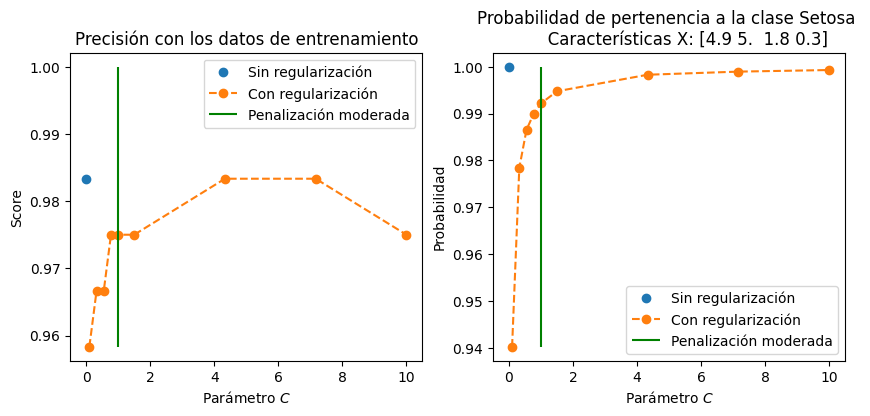

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X = np.array([4.9, 5.0, 1.8, 0.3])    # Características particulares
X = X.reshape(1,-1)

Cs = np.concatenate((np.linspace(0.1, 1, 5), np.linspace(1.5, 10, 4)))

scores_train = np.zeros(len(Cs)+1)
probs = np.zeros((len(Cs)+1, 3))    # Para cada C

# Regularización desactivada: penalty=none
#
softmax_reg = LogisticRegression(multi_class="multinomial", penalty=None, random_state=42, max_iter=120)
softmax_reg.fit(X_train, y_train)

scores_train[0] = softmax_reg.score(X_train, y_train)
probMulX = softmax_reg.predict_proba(X)   # Prob de que X pertenezca a cada una de las 3 clases
probs[0] = probMulX[0]

# Regularización activada: penalty='l2' por defecto
#
for i, c in enumerate(Cs):
  softmax_reg = LogisticRegression(multi_class="multinomial", C=c, random_state=42, max_iter=120)
  softmax_reg.fit(X_train, y_train)

  scores_train[i+1] = softmax_reg.score(X_train, y_train)
  probMulX = softmax_reg.predict_proba(X)
  probs[i+1] = probMulX[0]

# Gráficos para la clase Setosa
fig = plt.figure(figsize=(10,4))
# fig.suptitle(f"Score y Probabilidad del modelo de Softmax para la clase {clases[0]}")#, fontsize=15)

axs = fig.add_subplot(121)
axs.set_title('Precisión con los datos de entrenamiento')
axs.plot(0, scores_train[0], 'o', label='Sin regularización')
axs.plot(Cs, scores_train[1:], 'o--', label='Con regularización')
axs.vlines(1.0, min(scores_train), 1, color='g', label='Penalización moderada')
axs.set_xlabel('Parámetro $C$')
axs.set_ylabel('Score')
axs.legend()

axp = fig.add_subplot(122)
axp.set_title(f'Probabilidad de pertenencia a la clase {clases[0]} \n \
      Características X: {X[0]}')
axp.plot(0, probs[0,0], 'o', label='Sin regularización')
axp.plot(Cs, probs[1:,0], 'o--', label='Con regularización')
axp.vlines(1.0, min(probs[:,0]), 1, color='g', label='Penalización moderada')
axp.set_xlabel('Parámetro $C$')
axp.set_ylabel('Probabilidad')
axp.legend()

plt.show()

* Estos gráficos ilustran cómo afecta la regularización en el modelo de regresión logística multinomial (Softmax) al entrenar y predecir probabilidades para una muestra con características particulares.

* Cuando no hay regularización, el modelo es más flexible, logrando un score cerca de 1.0 que puede llevar al sobreajuste de los datos de entrenamiento.

* Con regularización, a medida que $C$ aumenta (menor fuerza de regularización), la precisión mejora inicialmente, pero se estabiliza y puede disminuir levemente si el modelo comienza a sobreajustar. El sobreajuste también se puede notar en el gráfico de probabilidad, donde con el aumento de $C$ la probabilidad de que dichas características pertenezcan a una clase Setosa crece acercándose exactamente a 1, comportándose similar al caso sin regularización.

* Con valores $C<1$ la precisión es menor porque el modelo está restringido (mayor regularización), y la probabilidad no se calcula con mejor precisión.

### 3. Análisis de métricas y curvas de aprendizaje

Entrenaremos el modelo con diferentes tamaños de datos de entrenamiento, calcularemos las métricas en cada caso y graficaremos las curvas de aprendizaje para analizar la evolución del desempeño.

* Si las curvas convergen cerca del 100%, el modelo tiene un buen desempeño.

* Si las curvas están separadas, el modelo puede estar sobreajustando.

* Si ambas curvas tienen valores bajos, el modelo está subajustando.

\
**Estrategia:**

* Utilizaremos la función `sklearn.model_selection.learning_curve()` para determinar las puntuaciones probando diferentes tamaños del conjunto de entrenamiento. Dividiremos los datos de entrenamiento en $k$ pliegues para realizar una validación cruzada.

\
**Validación cruzada:**

En lugar de usar una única partición de los datos para entrenamiento y prueba, la validación cruzada divide los datos en varias particiones o "pliegues" ($k$ folds) y utiliza diferentes combinaciones de ellos para entrenar y evaluar el modelo.

1. K-Fold Cross-Validation:

  * Divide el conjunto de datos en $K$ partes o pliegues (folds).

  * En cada iteración, usa $K-1$ pliegues para entrenamiento y el pliegue restante para prueba. Los nuevos datos de entrenamiento se van dividiendo en $n$ muestras de diferentes tamaños (proporciones desde el 10% al 100%) para entrenar el modelos y evaluar el score.

  * Se repite $k$ veces, y el resultado final es el promedio de las métricas de las iteraciones.

    * Ejemplo: Para $K=5$, los datos se dividen en 5 subconjuntos:
    
      Iteración 1: Pliegues 1-4 para entrenamiento, pliegue 5 para prueba.
    
      Iteración 2: Pliegues 1-3 y 5 para entrenamiento, pliegue 4 para prueba.

2. Stratified K-Fold Cross-Validation:

  Similar a K-Fold, pero divide los datos manteniendo la proporción de clases en cada pliegue.

3. Time Series Cross-Validation:

  Los datos de entrenamiento siempre están antes de los datos de prueba para respetar la naturaleza temporal.


**Función `learning_curve()`**

Determina puntajes de entrenamiento y pruebas validados de forma cruzada para diferentes tamaños de conjuntos de entrenamiento.

Esta función genera curvas de aprendizaje para evaluar cómo el desempeño del modelo varía con el tamaño del conjunto de entrenamiento.

**Parámetros importantes:**

* `estimator`: Modelo que se quiere evaluar.

* `X` y `y`: Características y etiqueta objetivo, respectivamente.

* `groups`: (opcional) Grupos de datos para validación cruzada estratificada por grupos.

* `train_sizes` (por defecto: `np.linspace(0.1, 1.0, 5)`): Corresponde a las proporciones de los datos de entrenamiento que se utilizarán para generar las curvas.

* `cv`: Determina la estrategia de división de validación cruzada. Las posibles entradas son:

  * `None`: Usa por defecto 5 pliegues.

  * `int`: Especifica el número de pliegues y utiliza por defecto la estratificación `StratifiedKFold` (para poca abundancia de datos).

  * `splits`: Matrices de índices (p.ej. `StratifiedShuffleSplit`, para grandes datasets, donde no importa el solapamiento de datos de pliegues).

* `scoring` (None por defecto): Métrica utilizada para evaluar el desempeño del modelo.

  Ejemplo: "accuracy", "precision", "recall", "f1", etc.

* `n_jobs`: Número de tareas paralelas para ejecutar (múltiples CPUs).

* `random_state`: Controla la aletoriedad de las muestras estratificadas (shuffle).

**Salidas:**

* `train_sizes_abs`: Tamaños absolutos del conjunto de entrenamiento utilizados en cada paso.

* `train_scores` $(n,k)$: Array de puntuaciones en los conjuntos de entrenamiento para cada tamaño y división de validación cruzada.

* `test_scores`: Array de puntuaciones en los conjuntos de prueba para cada tamaño y división de validación cruzada.

\
A continuación, se promedian las puntuaciones de las $k$ ejecuciones para cada tamaño de subconjunto de entrenamiento.


In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

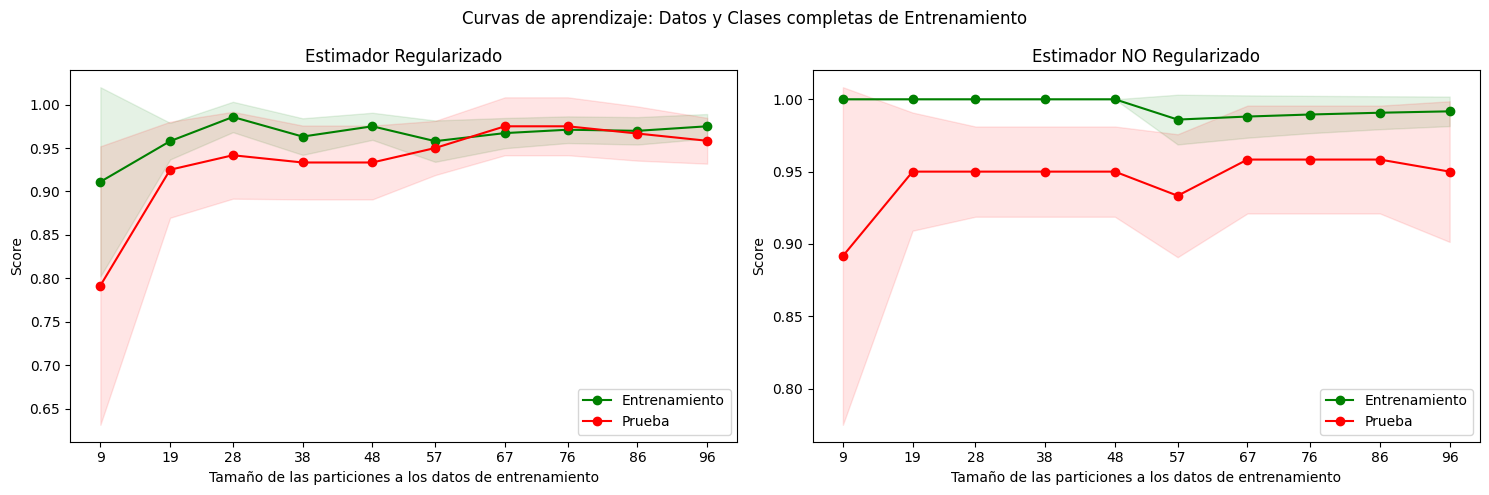

In [13]:
# Estratificación cruzada -> Generamos 5 conjuntos de índices estratificados

''' Ya que el volumen de datos es muy pequeño, para la validación cruzada tiene
    más rendimiento el estratificador StratifiedKFold, pues garantiza que en cada fold
    la proporción de clases sea similar, evitando sesgos en el conjunto de entrenamiento y en el de prueba.

    Contrario de StratifiedShuffleSplit donde se puede dar solapamiento de datos en los pliegues.

    StratifiedKFold -> Es especial para validación cruzada y curvas de aprendizaje
'''
# splits = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------------------------------------------------------------------------
# Estimador de regresión logística: REGULARIZADO
model = LogisticRegression(multi_class="multinomial", random_state=42)

# Curvas de aprendizaje
# cv=5 -> Validación cruzada generando 5 pliegues StratifiedKFold para cada subconjunto de entrenamiento
# cv=splits -> Validación cruzada usando pliegues estratificados personalizadamente
# train_sizes -> n=10 particiones a los datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=splits, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=4
)

# Medias y desviaciones de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)   # n=10: Promedio de los pliegues
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico de las curvas de aprendizaje
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Curvas de aprendizaje: Datos y Clases completas de Entrenamiento")
axes[0].set_title('Estimador Regularizado')
axes[0].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento', c='g')
axes[0].fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color="g")
axes[0].plot(train_sizes, test_scores_mean, 'o-', label='Prueba', c='r')
axes[0].fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color="r")
axes[0].set_xticks(train_sizes)
axes[0].set_xlabel('Tamaño de las particiones a los datos de entrenamiento')
axes[0].set_ylabel('Score')
axes[0].legend()

# -------------------------------------------------------------------------------------------------
# Estimador de regresión logística: NO REGULARIZADO
model = LogisticRegression(multi_class="multinomial", penalty=None, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=splits, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=4
)

# Medias y desviaciones de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)   # n=10: Promedio de los pliegues
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

axes[1].set_title('Estimador NO Regularizado')
axes[1].plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento', c='g')
axes[1].fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color="g")
axes[1].plot(train_sizes, test_scores_mean, 'o-', label='Prueba', c='r')
axes[1].fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color="r")
axes[1].set_xticks(train_sizes)
axes[1].set_xlabel('Tamaño de las particiones a los datos de entrenamiento')
axes[1].set_ylabel('Score')
axes[1].legend()

fig.tight_layout()

El gráfico muestra que el estimador regularizado logra un mejor equilibrio entre el desempeño en entrenamiento y en prueba (con brecha pequeña entre ambas curvas y menor variabilidad), lo cual indica menos sobreajuste y una mayor estabilidad a medida que crece el tamaño de los datos. Por el contrario, el estimador no regularizado presenta una brecha más amplia entre el puntaje de entrenamiento (cercano a 1) y el de prueba, así como mayores fluctuaciones, evidenciando una tendencia a sobreajustar y a ser más sensible a los cambios en los datos de entrenamiento.

### 4. Fronteras de decisión para la multiclasificación

In [14]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

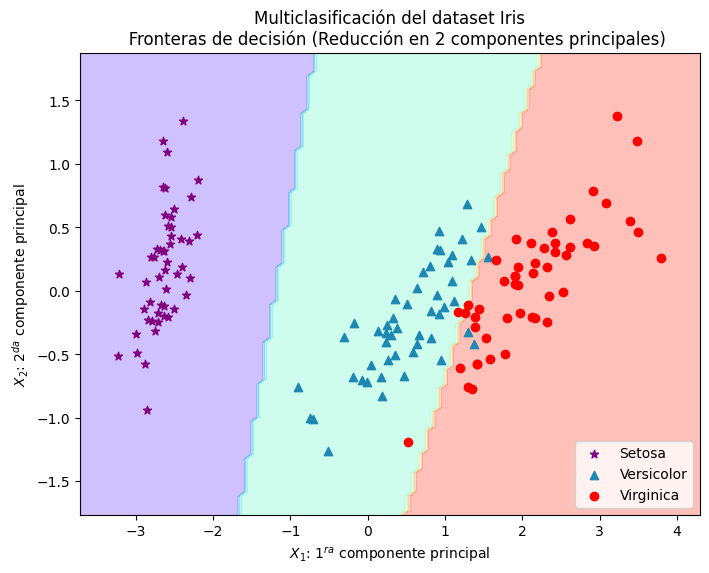

In [15]:
# Tomamos la base de datos completa
X = iris["data"]
y = iris["target"]

# Preparamos el modelo de regresión logística regularizado moderadamente (C=1.0) y de multiclasificación
softmax_reg_full = LogisticRegression(multi_class="multinomial", random_state=42, max_iter=120)

# Reducción en componentes principales
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)    # X1, X2: Nuevas componentes
X1 = X_reduced[:, 0]
X2 = X_reduced[:, 1]
softmax_reg_full.fit(X_reduced, y)  # Preparamos el modelo con las componentes principales

# Gráfico de las fronteras de decisión
X1_, X2_ = np.meshgrid(np.linspace(X1.min()-0.5, X1.max()+0.5, 100), \
                       np.linspace(X2.min()-0.5, X2.max()+0.5, 100) )

# Aplanamos los arreglos de la malla para aplicar el modelo a cada punto
X_new = np.c_[X1_.ravel(), X2_.ravel()]
Y_predict = softmax_reg_full.predict(X_new)
Y_predict = Y_predict.reshape(X1_.shape)

fig = plt.figure(figsize=(8,6))
plt.title('Multiclasificación del dataset Iris\n \
  Fronteras de decisión (Reducción en 2 componentes principales)')
plt.contourf(X1_, X2_, Y_predict, cmap=plt.cm.rainbow, alpha=0.3)
# plt.scatter(X1, X2, c=y, cmap=ListedColormap(['blue','#1e88b2','red']))
plt.scatter(X1[y==0], X2[y==0], c='purple', marker='*', label=clases[0])
plt.scatter(X1[y==1], X2[y==1], c='#1e88b2', marker='^', label=clases[1])
plt.scatter(X1[y==2], X2[y==2], c='r', label=clases[2])
plt.legend(loc='lower right')
plt.xlabel(r'$X_1$: $1^{ra}$ componente principal')
plt.ylabel(r'$X_2$: $2^{da}$ componente principal')
plt.show()


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html